In [1]:
import matplotlib.pyplot as plt

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Match contours to license plate or character template
def find_contours(dimensions, img) :

    # Find all contours in the image
    cntrs, _ = cv2.findContours(img.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Retrieve potential dimensions
    lower_width = dimensions[0]
    upper_width = dimensions[1]
    lower_height = dimensions[2]
    upper_height = dimensions[3]
    
    # Check largest 5 or  15 contours for license plate or character respectively
    cntrs = sorted(cntrs, key=cv2.contourArea, reverse=True)[:15]
    
    ii = cv2.imread('contour.jpg')
    
    x_cntr_list = []
    target_contours = []
    img_res = []
    for cntr in cntrs :
        #detects contour in binary image and returns the coordinates of rectangle enclosing it
        intX, intY, intWidth, intHeight = cv2.boundingRect(cntr)
        
        #checking the dimensions of the contour to filter out the characters by contour's size
        if intWidth > lower_width and intWidth < upper_width and intHeight > lower_height and intHeight < upper_height :
            x_cntr_list.append(intX) #stores the x coordinate of the character's contour, to used later for indexing the contours

            char_copy = np.zeros((44,24))
            #extracting each character using the enclosing rectangle's coordinates.
            char = img[intY:intY+intHeight, intX:intX+intWidth]
            char = cv2.resize(char, (20, 40))
            
            cv2.rectangle(ii, (intX,intY), (intWidth+intX, intY+intHeight), (50,21,200), 2)
            plt.imshow(ii, cmap='gray')

#             Make result formatted for classification: invert colors
            char = cv2.subtract(255, char)

            # Resize the image to 24x44 with black border
            char_copy[2:42, 2:22] = char
            char_copy[0:2, :] = 0
            char_copy[:, 0:2] = 0
            char_copy[42:44, :] = 0
            char_copy[:, 22:24] = 0

            img_res.append(char_copy) #List that stores the character's binary image (unsorted)
            
    #Return characters on ascending order with respect to the x-coordinate (most-left character first)
            
    plt.show()
    #arbitrary function that stores sorted list of character indeces
    indices = sorted(range(len(x_cntr_list)), key=lambda k: x_cntr_list[k])
    img_res_copy = []
    for idx in indices:
        img_res_copy.append(img_res[idx]) # stores character images according to their index
    img_res = np.array(img_res_copy)

    return img_res

In [15]:
import cv2 
cv2.destroyAllWindows()

In [11]:
# Find characters in the resulting images
def segment_characters(image) :

    # Preprocess cropped license plate image
    img_lp = cv2.resize(image, (333, 75))
    img_gray_lp = cv2.cvtColor(img_lp, cv2.COLOR_BGR2GRAY)
    _, img_binary_lp = cv2.threshold(img_gray_lp, 200, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    img_binary_lp = cv2.erode(img_binary_lp, (3,3))
    img_binary_lp = cv2.dilate(img_binary_lp, (3,3))

    LP_WIDTH = img_binary_lp.shape[0]
    LP_HEIGHT = img_binary_lp.shape[1]

    # Make borders white
    img_binary_lp[0:3,:] = 255
    img_binary_lp[:,0:3] = 255
    img_binary_lp[72:75,:] = 255
    img_binary_lp[:,330:333] = 255

    # Estimations of character contours sizes of cropped license plates
    dimensions = [LP_WIDTH/6,
                       LP_WIDTH/2,
                       LP_HEIGHT/10,
                       2*LP_HEIGHT/3]
    plt.imshow(img_binary_lp, cmap='gray')
    plt.show()
    cv2.imwrite('contour.jpg',img_binary_lp)

    # Get contours within cropped license plate
    char_list = find_contours(dimensions, img_binary_lp)
    
    return char_list

In [6]:
os.getcwd()

'c:\\Users\\samar\\Desktop\\capstone\\anprtest4\\APNR'

In [8]:
import os

def list_files_in_directory(directory):
    list_paths = []
    for root, dirs, files in os.walk(directory):
        print(f"Directory: {root}")
        for file in files:
            # print(f"  {file}")
            list_paths.append(os.path.join(root, file))
    return list_paths

# Example usage
directory_path = 'c:\\Users\\samar\\Desktop\\capstone\\anprtest4\\datasets\\train\\images'
list_files_in_directory(directory_path)

Directory: c:\Users\samar\Desktop\capstone\anprtest4\datasets\train\images


['c:\\Users\\samar\\Desktop\\capstone\\anprtest4\\datasets\\train\\images\\00009e5b390986a0_jpg.rf.04d1cbabbde68b6be73ada81c47f3528.jpg',
 'c:\\Users\\samar\\Desktop\\capstone\\anprtest4\\datasets\\train\\images\\00009e5b390986a0_jpg.rf.134d6373e0bde30fc8b9747bc1232667.jpg',
 'c:\\Users\\samar\\Desktop\\capstone\\anprtest4\\datasets\\train\\images\\00009e5b390986a0_jpg.rf.e2f9df03aa702fad603db72632cae9cc.jpg',
 'c:\\Users\\samar\\Desktop\\capstone\\anprtest4\\datasets\\train\\images\\000228608388803f_jpg.rf.5ab7879e18b0d42fc40013f4da243d25.jpg',
 'c:\\Users\\samar\\Desktop\\capstone\\anprtest4\\datasets\\train\\images\\000228608388803f_jpg.rf.924b00a39d9fad9da20e784dacfc41b7.jpg',
 'c:\\Users\\samar\\Desktop\\capstone\\anprtest4\\datasets\\train\\images\\000228608388803f_jpg.rf.fbf08c48170038e42cceb5f39a174f49.jpg',
 'c:\\Users\\samar\\Desktop\\capstone\\anprtest4\\datasets\\train\\images\\00043e7c5c4c025a_jpg.rf.1302d567f044eda1faa2142fb70f12d0.jpg',
 'c:\\Users\\samar\\Desktop\\capst

Directory: c:\Users\samar\Desktop\capstone\anprtest4\datasets\train\images


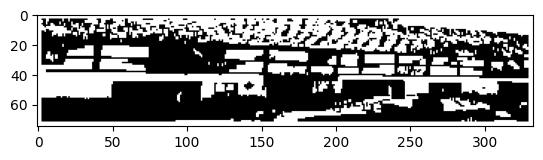

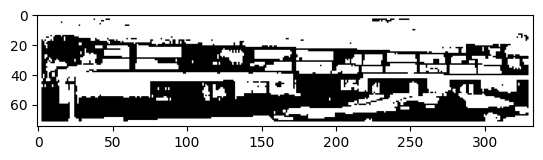

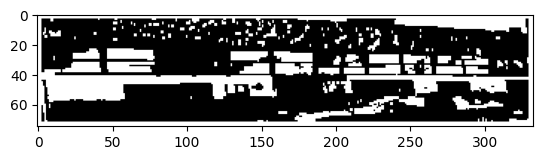

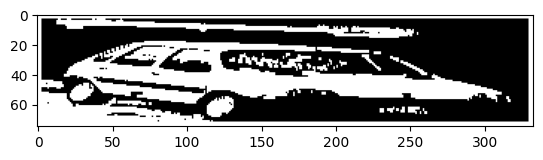

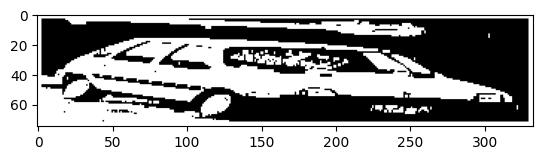

In [12]:
for img_path in list_files_in_directory(directory_path)[:5]:
    img = cv2.imread(img_path)
    char = segment_characters(img)


[]


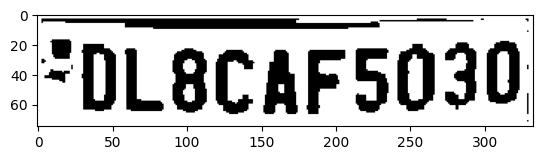

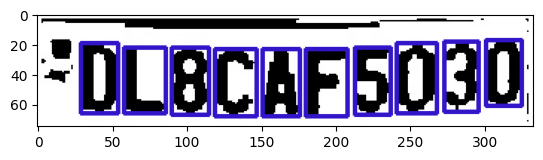

In [65]:
img = cv2.imread('car_plate.png')
char = segment_characters(img)

IndexError: index 0 is out of bounds for axis 0 with size 0

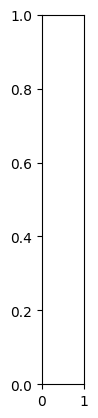

In [70]:
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(char[i], cmap='gray')
    plt.axis('off')

In [7]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1)
train_generator = train_datagen.flow_from_directory(
        'data/train',  # this is the target directory
        target_size=(28,28),  # all images will be resized to 28x28
        batch_size=1,
        class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
        'data/val',  # this is the target directory
        target_size=(28,28),  # all images will be resized to 28x28        batch_size=1,
        class_mode='categorical')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D
from tensorflow.keras import optimizers

In [ ]:
model = Sequential()
model.add(Conv2D(32, (24,24), input_shape=(28, 28, 3), activation='relu', padding='same'))
# model.add(Conv2D(32, (20,20), input_shape=(28, 28, 3), activation='relu', padding='same'))
# model.add(Conv2D(32, (20,20), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(36, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.00001), metrics=['accuracy'])

In [ ]:
class stop_training_callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc') > 0.992):
      self.model.stop_training = True

In [ ]:
import datetime
!rm -rf logs
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
batch_size = 1
callbacks = [tensorboard_callback, stop_training_callback()]
model.fit_generator(
      train_generator,
      steps_per_epoch = train_generator.samples // batch_size,
      validation_data = validation_generator, 
      validation_steps = validation_generator.samples // batch_size,
      epochs = 80, callbacks=callbacks)

In [1]:
from tensorflow.keras.models import load_model

# Load your models
model1 = load_model('bigmodel.keras')
#model2 = load_model('path_to_model2.h5')

In [2]:
model1.input_shape

(None, 32, 32, 3)

In [27]:
import cv2
import os

# Correct file path with raw string or forward slashes
img_path = r'E:\Tech\Python\Projects\Automobile Automobile Surveillance System\ANPR_Dataset\train\class_2\class_2_2.jpg'

# Check if the file exists
if not os.path.exists(img_path):
    print(f"File not found: {img_path}")
else:
    # Attempt to load the image
    img = cv2.imread(img_path)

    if img is None:
        print("Failed to load image. Check if the path is correct.")
    else:
        # Resize and display the image
        img_resized = cv2.resize(img, (32, 32))
        cv2.imshow('Resized Image', img_resized)
        cv2.waitKey(0)
        cv2.destroyAllWindows()


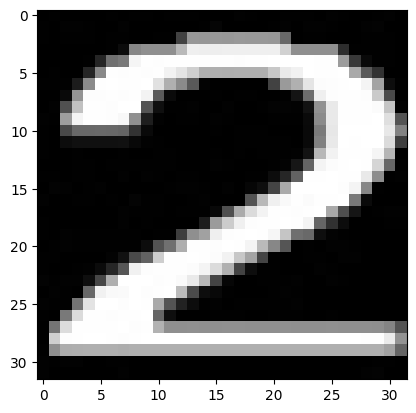

In [23]:
plt.imshow(img_resized)

In [35]:
img = cv2.imread(img_path)

In [36]:
new_img = cv2.resize(img, (32, 32))

In [37]:
new_img.shape

(32, 32, 3)

In [44]:
import numpy as np

# Assuming new_img has shape (32, 32, 3)
print(new_img.shape)  # Should print (32, 32, 3)

# Expand dimensions to add the batch size
new_img_expanded = np.expand_dims(new_img, axis=0)
print(new_img_expanded.shape)  # Should print (1, 32, 32, 3)

# Now, predict using the model
prediction = model1.predict(new_img_expanded)
print(prediction)


(32, 32, 3)
(1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 938ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [43]:
print(new_img.shape)
print(model1.input_shape)
model1.predict(new_img)

(32, 32, 3)
(None, 32, 32, 3)


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_11_1/Cast:0", shape=(32, 32, 3), dtype=float32). Expected shape (None, 32, 32, 3), but input has incompatible shape (32, 32, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 32, 3), dtype=uint8)
  • training=False
  • mask=None

In [49]:
def fix_dimension(img): 
    new_img = np.zeros((32,32,3))
    for i in range(3):
        new_img[:,:,i] = img
    return new_img
  
def show_results():
    dic = {}
    characters = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    for i, c in enumerate(characters):
        dic[i] = c

    output = []
    for i, ch in enumerate(char):  # iterating over the characters
        img_ = cv2.resize(ch, (32, 32))
        img = fix_dimension(img_)
        img = img.reshape(1, 32, 32, 3)  # preparing image for the model
        
        # Predicting the class
        y_ = model1.predict(img)[0]  # Assuming model1.predict returns a single prediction
        y_index = np.argmax(y_)  # Get the index of the highest probability
        
        character = dic[y_index]  # Map index to the character
        output.append(character)  # Storing the result in a list
        
    plate_number = ''.join(output)
    
    return plate_number

print(show_results())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
DL8CAF5030


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

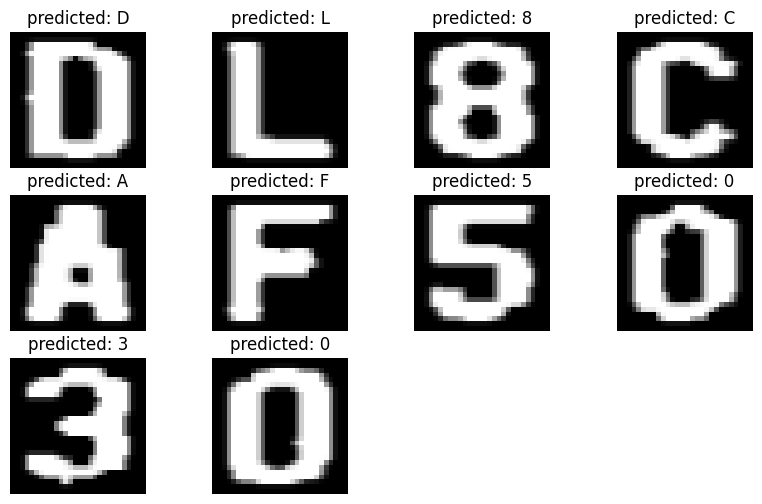

In [50]:
plt.figure(figsize=(10,6))
for i,ch in enumerate(char):
    img = cv2.resize(ch, (28,28))
    plt.subplot(3,4,i+1)
    plt.imshow(img,cmap='gray')
    plt.title(f'predicted: {show_results()[i]}')
    plt.axis('off')
plt.show()

In [3]:
import pytesseract

In [2]:
import cv2
import easyocr

In [15]:
img= cv2.imread("C:\\Users\\samar\\Desktop\\capstone\\anprtest4\\datasets\\test2\\images\\00000030.jpg")

In [16]:
reader = easyocr.Reader(['en'])

# Load image


# Convert to RGB (EasyOCR expects RGB format)
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Perform OCR
result = reader.readtext(image_rgb)

In [7]:
import matplotlib.pyplot as plt

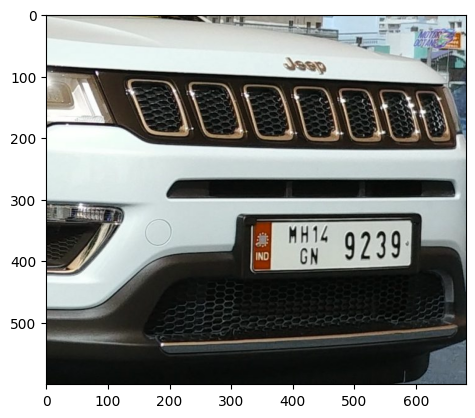

In [17]:
plt.imshow(img)

In [11]:
result[0]

([[62, 26], [130, 26], [130, 82], [62, 82]], 'KL', 0.9829409231399671)

In [18]:
for detection in result:
    box,text,conf = detection
    print("Detected Number Plate:", text,conf)

Detected Number Plate: Jeep 0.9818742871284485
Detected Number Plate: UD 0.2092097561410098
Detected Number Plate: MhIL 0.39479848742485046
Detected Number Plate: IND 0.990812581122241
Detected Number Plate: Gn 0.5965481667283937
Detected Number Plate: 9239 0.9999269247055054


In [25]:
def preeprocces_for_ocr(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to remove noise
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply edge detection
    edges = cv2.Canny(blur, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours by area and keep the largest one (likely the number plate)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    # Loop through contours to find the best possible rectangle
    number_plate_contour = None
    for contour in contours:
        epsilon = 0.018 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        if len(approx) == 4:  # Number plates are usually rectangular
            number_plate_contour = approx
            break
    # cv2.drawContours(img, [number_plate_contour], -1, (0, 255, 0), 3)
    return number_plate_contour
    

# Draw the contour on the image (optional)


In [35]:
img = cv2.imread("C:\\Users\\samar\\Desktop\\capstone\\anprtest4\\datasets\\test2\\images\\00000010.jpg")

In [36]:
number_plate_contour = preeprocces_for_ocr(img)

Detected Number Plate Text:
 TN11AK 9149Fata


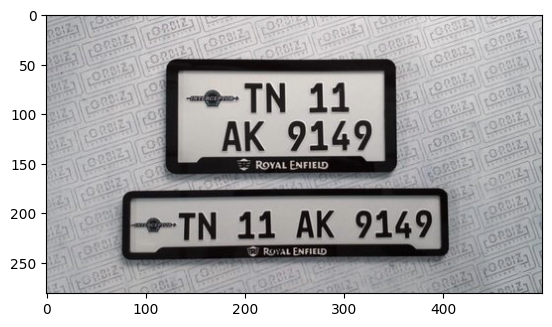

In [37]:
import cv2
import numpy as np
import easyocr
import re

# Initialize EasyOCR reader (use appropriate language code, e.g., 'en' for English)
reader = easyocr.Reader(['en'])

if number_plate_contour is not None:
    # Perspective transformation to correct the orientation
    pts = number_plate_contour.reshape(4, 2)
    rect = np.zeros((4, 2), dtype="float32")

    # Top-left point will have the smallest sum, bottom-right will have the largest sum
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    # Top-right will have the smallest difference, bottom-left will have the largest difference
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    # Determine the width and height of the new image
    (tl, tr, br, bl) = rect
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    # Create a top-down view of the image (bird's eye view)
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype="float32")

    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(img, M, (maxWidth, maxHeight))

    # Convert to grayscale and threshold for better OCR performance
    gray_warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
    _, number_plate_img = cv2.threshold(gray_warped, 150, 255, cv2.THRESH_BINARY)

    # Perform OCR on the corrected number plate using EasyOCR
    result = reader.readtext(number_plate_img)

    # Concatenate all detected text parts
    concatenated_text = ''.join([item[-2] for item in result])

    # Remove non-alphanumeric characters at the start and end of the concatenated text
    cleaned_text = re.sub(r'^\W+|\W+$', '', concatenated_text)

    # Print the cleaned, concatenated text
    print("Detected Number Plate Text:\n", cleaned_text)

else:
    print("Number plate could not be detected.")
plt.imshow(img)

In [31]:
import numpy as np
import pytesseract

In [42]:
import cv2
import numpy as np
import easyocr
import re


def preprocess_for_ocr(img):

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to remove noise
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply edge detection
    edges = cv2.Canny(blur, 50, 150)

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours by area and keep the largest one (likely the number plate)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    # Loop through contours to find the best possible rectangle
    number_plate_contour = None
    for contour in contours:
        epsilon = 0.018 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        if len(approx) == 4:  # Number plates are usually rectangular
            number_plate_contour = approx
            break

    if number_plate_contour is None:
        return None

    # Perspective transformation to correct the orientation
    pts = number_plate_contour.reshape(4, 2)
    rect = np.zeros((4, 2), dtype="float32")

    # Top-left point will have the smallest sum, bottom-right will have the largest sum
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    # Top-right will have the smallest difference, bottom-left will have the largest difference
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    # Determine the width and height of the new image
    (tl, tr, br, bl) = rect
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    # Create a top-down view of the image (bird's eye view)
    dst = np.array(
        [[0, 0], [maxWidth - 1, 0], [maxWidth - 1, maxHeight - 1], [0, maxHeight - 1]],
        dtype="float32",
    )
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(img, M, (maxWidth, maxHeight))

    # Convert to grayscale and threshold for better OCR performance
    gray_warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
    _, number_plate_img = cv2.threshold(gray_warped, 150, 255, cv2.THRESH_BINARY)
    return number_plate_img


def concat_number_plate(result):
    # Concatenate all detected text parts
    concatenated_text = "".join([item[-2] for item in result])

    # Remove non-alphanumeric characters at the start and end of the concatenated text
    cleaned_text = re.sub(r"^\W+|\W+$", "", concatenated_text)

    return cleaned_text




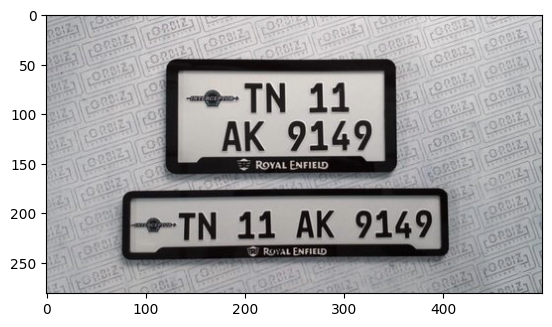

In [40]:
img = cv2.imread("C:\\Users\\samar\\Desktop\\capstone\\anprtest4\\datasets\\test2\\images\\00000010.jpg")
plt.imshow(img)

In [43]:
prim = preprocess_for_ocr(img)
# Initialize EasyOCR reader (use appropriate language code, e.g., 'en' for English)
reader = easyocr.Reader(["en"])

# Perform OCR on the corrected number plate using EasyOCR
result = reader.readtext(prim)
concat_number_plate(result)

'TN11AK 9149Fata'

In [44]:
import re
from collections import Counter, deque

class NumberPlateDetector:
    def __init__(self, history_length=10):
        """
        Initialize the NumberPlateDetector with an optional history length.

        Parameters:
        history_length (int): Number of most recent OCR results to consider. Default is 100.
        """
        self.history_length = history_length
        self.ocr_stream = deque(maxlen=history_length)
        self.plate_counts = Counter()

    def normalize_plate(self, plate):
        """
        Normalize the number plate text by converting to uppercase,
        removing non-alphanumeric characters, and standardizing format.

        Parameters:
        plate (str): The raw OCR detected text of the number plate.

        Returns:
        str: The normalized number plate text.
        """
        # Convert to uppercase and remove non-alphanumeric characters
        normalized = re.sub(r'[^A-Za-z0-9]', '', plate).upper()
        return normalized

    def update_stream(self, new_plate):
        """
        Update the OCR stream with a new detected plate.

        Parameters:
        new_plate (str): The new OCR detected number plate value.
        """
        normalized_plate = self.normalize_plate(new_plate)
        if normalized_plate:
            # Update the deque with the new plate
            if len(self.ocr_stream) == self.history_length:
                # Remove the oldest plate from the counter
                oldest_plate = self.ocr_stream.popleft()
                self.plate_counts[oldest_plate] -= 1
                if self.plate_counts[oldest_plate] == 0:
                    del self.plate_counts[oldest_plate]

            # Add the new plate to the stream
            self.ocr_stream.append(normalized_plate)
            self.plate_counts[normalized_plate] += 1

    def get_most_likely_plate(self):
        """
        Get the most likely number plate from the current stream.

        Returns:
        str: The most likely number plate value.
        """
        if self.plate_counts:
            most_common_plate, _ = self.plate_counts.most_common(1)[0]
            return most_common_plate
        return "No valid plates detected."

# Example usage:
detector = NumberPlateDetector()

# Simulate feeding the stream with OCR results
ocr_results = [
    "Number Plate: UP5420690", "Number Plate: UP5420690", "Number Plate: aUP5420590",
    "Number Plate: UP5420590", "Number Plate: UP5420590", "Number Plate: O:UP5420690",
    "Number Plate: OjUp5420690", "Number Plate: UP5420690", "Number Plate: OUp54z0590",
    "Number Plate: UP5420s90", "Number Plate: QUUP5420690", "Number Plate: QUP5420690",
    "Number Plate: Q:JUP54z0690", "Number Plate: ", "Number Plate: ", "Number Plate: ",
    "Number Plate: I", "Number Plate: 35", "Number Plate: N", 
    "Number Plate: Tn72 B6 ~1G_", "Number Plate: Tm72BB 6165", 
    "Number Plate: TM72ee6165", "Number Plate: Tn72BB 4165", "Number Plate: Tn72BB 6165", 
    "Number Plate: Tn72BB 4105", "Number Plate: N72 BB_6105", "Number Plate: ", 
    "Number Plate: ", "Number Plate: ", "Number Plate: ", "Number Plate: 72e 4105", 
    "Number Plate: v 72 BB 4165", "Number Plate: TN72BB 4105", "Number Plate: TN 72 BB 4105", 
    "Number Plate: TN72BB 4105", "Number Plate: Tn72 BB 4105", "Number Plate: TN 72 BB 4105", 
    "Number Plate: TM72 BB 4105", "Number Plate: TN72 BB_4105", "Number Plate: TN72BB 6105", 
    "Number Plate: TN72BB 6105", "Number Plate: Tm72 BB4105", "Number Plate: TN72BB 4165", 
    "Number Plate: Tn 72BB 6165", "Number Plate: TN72BB 4165", "Number Plate: TN72BB 6165", 
    "Number Plate: Tm 72BB 4165", "Number Plate: TN72 BB 6165", "Number Plate: TN72 BB 4165", 
    "Number Plate: TM72 BB 4165", "Number Plate: TN72BB 6165", "Number Plate: TN72 BB 4105", 
    "Number Plate: Tn72 BB 6105", "Number Plate: TN72BB 6105", "Number Plate: TN72 BB 4105", 
    "Number Plate: Tm72 BB 4105", "Number Plate: TN72 BB 4105", "Number Plate: TN72 BB 4105", 
    "Number Plate: TN72 BB 4165", "Number Plate: TN 72 BB-4105", "Number Plate: TN 72 BB-4105", 
    "Number Plate: TN72BB 6105", "Number Plate: Tn72 BB 4105", "Number Plate: TN 72 BB 6105",
]

for result in ocr_results:
    detector.update_stream(result.replace("Number Plate: ", ""))

# Get the most likely number plate value
most_likely_plate = detector.get_most_likely_plate()
print("Most Likely Number Plate:", most_likely_plate)


Most Likely Number Plate: TN72BB4105


In [1]:
def finalState(operations):
    max_index = max(max(op) for op in operations)
    
    switches = [0] * (max_index + 2)
    
    for start, end in operations:
        switches[start] += 1
        switches[end + 1] -= 1
        
    current_state = 0
    result = 0
    
    for i in range(1, max_index + 1):
        current_state += switches[i]
        if current_state % 2 == 1:
            result += i
    
    return result

operations = [[1, 4], [2, 6], [1, 6]]
print(finalState(operations))  


9
